<a href="https://colab.research.google.com/github/Saidani-Hazem/Machine_Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale,StandardScaler

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv('/content/drive/MyDrive/Livre.csv')
data = data.drop(['status_type' ,'status_published' ],axis =1)
data

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,351,12,22,349,2,0,0,0,0


In [31]:
# Normalise data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 0.23845248,  0.64610394,  0.32335035, ...,  0.07671305,
         0.47357035, -0.15574803],
       [ 0.23845248, -0.17319166, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.23845248, -0.00673846,  0.01308938, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [ 2.77385707, -0.49312768, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 2.77385707,  0.26131603, -0.23871662, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 2.77385707, -0.46070173, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [35]:
# initialise K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


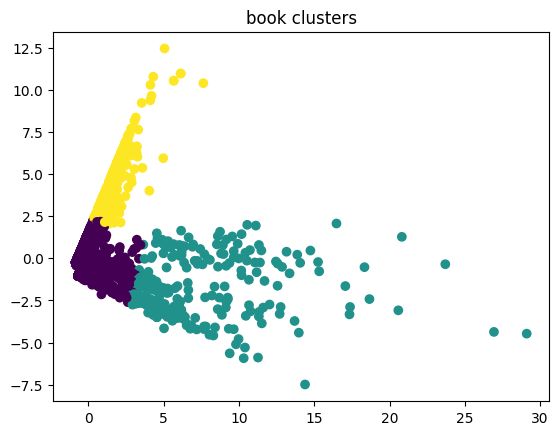

In [43]:
# redimension
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_scaled)

# display clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = data['cluster'], cmap='viridis')
plt.title("book clusters")
plt.show()

**another exemple (customer clustering)**

In [37]:
# import data
customers_data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
customers_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
# edit data
customers_data['Gender'] = customers_data['Gender'].replace({'Female': 0, 'Male': 1})
customers_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [41]:
# Normalise data
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customers_data)
customer_scaled

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_scaled)
customers_data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


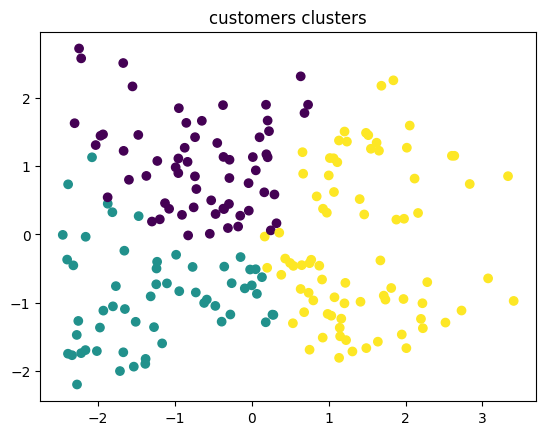

In [51]:
# redimension
data_pca = PCA(n_components=2)
custmers_pca = pca.fit_transform(customer_scaled)

# display clusters
plt.scatter(custmers_pca[:, 0], custmers_pca[:, 1], c = customers_data['cluster'], cmap='viridis')
plt.title("customers clusters")
plt.show()